In [10]:
# Cell 1: Imports and Module Reload
import pandas as pd
import os
import sys
import importlib
import textwrap
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # For VADER

# ---- New Imports for Plotting ----
import matplotlib.pyplot as plt
import seaborn as sns
# ---- End of New Imports ----

# Add 'src' to path and reload our analyzer module
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

try:
    from src import analyzer
    importlib.reload(analyzer) # Force reload
    print("Successfully imported and reloaded analyzer module.")
except ImportError as e:
    print(f"Error importing analyzer: {e}")
    print("Please ensure 'src/analyzer.py' exists and is in the correct path.")

# Download VADER lexicon
try:
    analyzer_vader = SentimentIntensityAnalyzer()
    print("VADER analyzer initialized.")
except LookupError:
    print("Downloading VADER lexicon...")
    import nltk
    nltk.download('vader_lexicon')
    print("VADER lexicon downloaded.")

Successfully imported and reloaded analyzer module.
VADER analyzer initialized.


In [11]:
# Cell 2: Load Cleaned CSV Data (No Change)
PROCESSED_DATA_PATH = '../data/processed/cleaned-posts.csv'
LABELED_DATA_PATH = '../data/processed/labeled-posts.csv' # Final output path

try:
    df = pd.read_csv(PROCESSED_DATA_PATH)
    print(f"Successfully loaded {len(df)} cleaned posts from {PROCESSED_DATA_PATH}")
    
    # Handle potential empty strings (VADER might fail on NaN)
    df['tokens_joined'] = df['tokens_joined'].fillna('')
    print(df.info())
    print(df.head())
except Exception as e:
    print(f"Error loading {PROCESSED_DATA_PATH}: {e}")

Successfully loaded 1193 cleaned posts from ../data/processed/cleaned-posts.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1193 non-null   object
 1   title          1193 non-null   object
 2   cleaned_text   996 non-null    object
 3   tokens_joined  1193 non-null   object
dtypes: object(4)
memory usage: 37.4+ KB
None
        id                                              title  \
0  1nq5b7a  There's Over 1 Million AI Influencers Already ...   
1  1j0mjze    How to Create Profitable AI Influencers in 2025   
2  1gc7syt                                      **IMPORTANT**   
3  1dzjxq8              Viral/Controversial Instagram Moments   
4  16nljql  📢 Calling all digital enthusiasts! 🌐 [VIRTUAL ...   

                                        cleaned_text  \
0  if you think ai influencers are not working or...   
1  ai i

In [12]:
# Cell 3: Run VADER to Create Labels (No Change)
if 'df' in locals():
    print("Running VADER sentiment analysis to create labels...")
    
    # Apply the get_vader_sentiment function from our analyzer module
    df['vader_sentiment'] = df['tokens_joined'].apply(analyzer.get_vader_sentiment)
    
    print("VADER analysis complete.")
    
    print("\n--- Sentiment Distribution (from VADER) ---")
    print(df['vader_sentiment'].value_counts(normalize=True))

Running VADER sentiment analysis to create labels...
VADER analysis complete.

--- Sentiment Distribution (from VADER) ---
vader_sentiment
positive    0.647108
neutral     0.197821
negative    0.155071
Name: proportion, dtype: float64


In [13]:
# Cell 4: Run All Saved Models for Comparison

if 'df' in locals():
    models_path = "models"

    # ✅ List of all available models (from your folder)
    model_list = [
        "adaboost_model",
        "decision_tree_model",
        "extra_trees_model",
        "gradient_boosting_model",
        "knn_k=5_model",
        "logistic_regression_model",
        "naive_bayes_model",
        "naive_bayes_multinomial_model",
        "passive_aggressive_model",
        "random_forest_model",
        "ridge_classifier_model",
        "sgd_classifier_model",
        "support_vector_machine_(svm)_model",
        "support_vector_machine_linearsvc_model",
        "support_vector_machine_svm_model",
        "svc_rbf_kernel_model"
    ]

    results = []
    print("--- Starting model comparison loop ---")

    for model_name in model_list:
        print(f"Running: {model_name}...")

        # Run your analyzer function
        result = analyzer.run_model_pipeline(df, model_name=model_name)
        results.append(result)

    print("--- Model comparison complete. ---")

else:
    print("DataFrame 'df' not found. Please run Cell 2 first.")


--- Starting model comparison loop ---
Running: adaboost_model...
Running: decision_tree_model...
Running: extra_trees_model...
Running: gradient_boosting_model...
Running: knn_k=5_model...
Running: logistic_regression_model...
Running: naive_bayes_model...
Running: naive_bayes_multinomial_model...
Running: passive_aggressive_model...
Running: random_forest_model...
Running: ridge_classifier_model...
Running: sgd_classifier_model...
Running: support_vector_machine_(svm)_model...
Running: support_vector_machine_linearsvc_model...
Running: support_vector_machine_svm_model...
Running: svc_rbf_kernel_model...
--- Model comparison complete. ---


In [14]:
# Cell 5: Display Results in a Comparison Table
if 'results' in locals():
    # Convert results list to a DataFrame
    results_df = pd.DataFrame(results).drop(columns=['report'])
    
    # Format for better readability
    results_df['accuracy_pct'] = (results_df['accuracy'] * 100).round(2)
    results_df['f1_score'] = results_df['f1_score'].round(3)
    
    results_df = results_df.rename(columns={
        'model_name': 'Model',
        'accuracy_pct': 'Accuracy (%)',
        'f1_score': 'F1-Score (Weighted)'
    }).set_index('Model')
    
    print("--- Model Performance Comparison ---")
    # Display the table, sorted by the best accuracy
    display(results_df.sort_values(by='Accuracy (%)', ascending=False))

--- Model Performance Comparison ---


,accuracy,F1-Score (Weighted),Accuracy (%)
Model,,,
support_vector_machine_(svm)_model,0.864583,0.840,86.46
support_vector_machine_svm_model,0.864583,0.840,86.46
ridge_classifier_model,0.864583,0.844,86.46
support_vector_machine_linearsvc_model,0.859375,0.845,85.94
passive_aggressive_model,0.854167,0.849,85.42
adaboost_model,0.848958,0.820,84.90
sgd_classifier_model,0.843750,0.836,84.38
extra_trees_model,0.843750,0.803,84.38
knn_k=5_model,0.838542,0.825,83.85


C:\Users\Zeel\AppData\Local\Temp\ipykernel_8800\3084532542.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Zeel\AppData\Local\Temp\ipykernel_8800\3084532542.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=11)


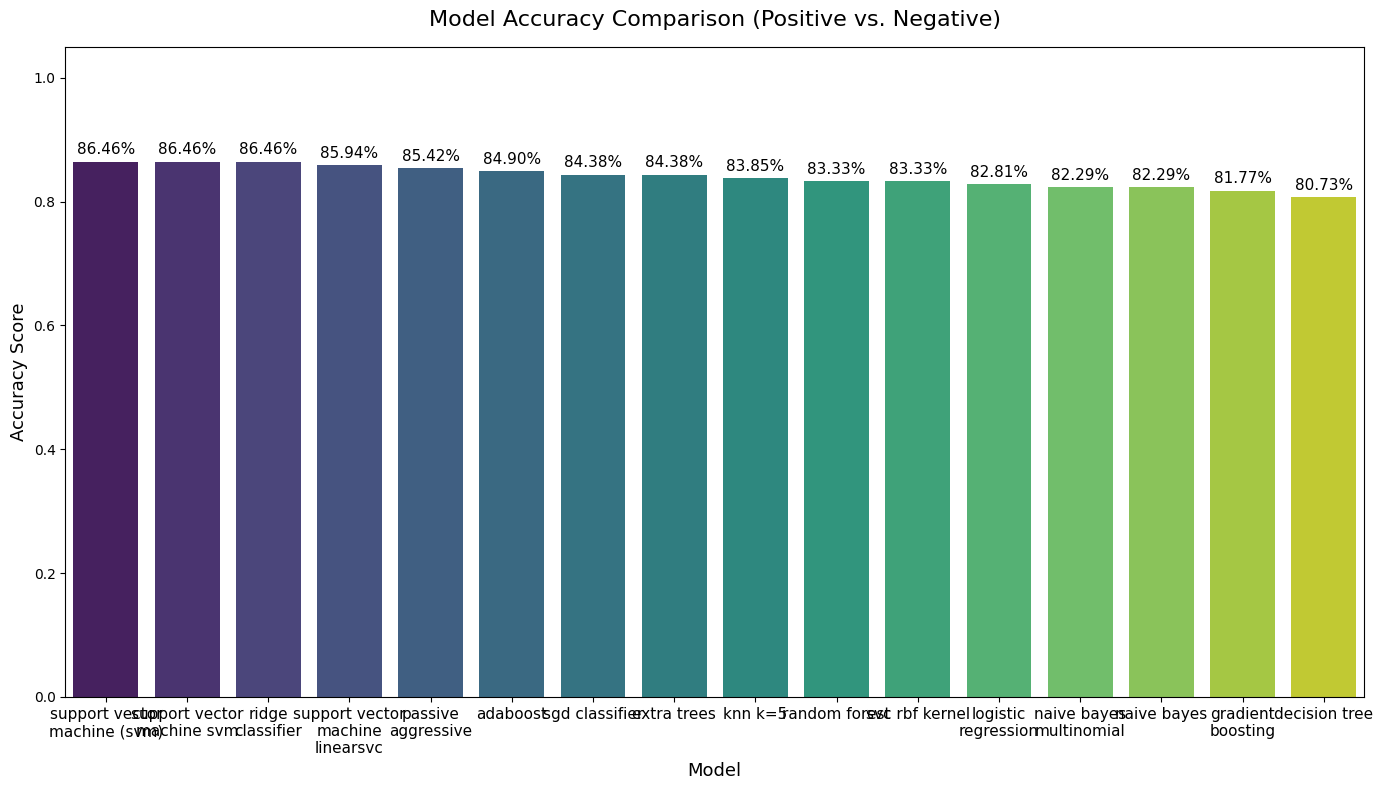

In [15]:
if 'results' in locals():
    
    plot_df = pd.DataFrame(results).sort_values(by='accuracy', ascending=False)

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        data=plot_df,
        x='model_name',
        y='accuracy',
        palette='viridis'
    )

    plt.title('Model Accuracy Comparison (Positive vs. Negative)', fontsize=16, pad=15)
    plt.xlabel('Model', fontsize=13)
    plt.ylabel('Accuracy Score', fontsize=13)
    plt.ylim(0, 1.05)

    # 🧹 Clean and wrap long model names
    wrapped_labels = [
        '\n'.join(textwrap.wrap(label.replace("_model", "").replace("_", " "), 15))
        for label in plot_df['model_name']
    ]
    ax.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=11)

    # ✨ Add formatted accuracy values (in %)
    for container in ax.containers:
        ax.bar_label(container, labels=[f"{v.get_height():.2%}" for v in container], padding=3, fontsize=11)

    plt.tight_layout()
    plt.show()

In [16]:
# Cell 7: Show Best Model's Full Report
if 'results' in locals():
    # Find the best model from our results list
    best_model = max(results, key=lambda x: x['accuracy'])
    
    print(f"--- Best Performing Model: {best_model['model_name']} ---")
    print(f"Accuracy: {best_model['accuracy']*100:.2f}%")
    print("\nClassification Report:")
    print(best_model['report'])

--- Best Performing Model: ridge_classifier_model ---
Accuracy: 86.46%

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.38      0.52        37
    positive       0.87      0.98      0.92       155

    accuracy                           0.86       192
   macro avg       0.85      0.68      0.72       192
weighted avg       0.86      0.86      0.84       192



In [17]:
# Cell 8: Save Final Labeled Data
if 'df' in locals():
    # We will use the VADER sentiment as our final label
    df_to_save = df[['id', 'title', 'cleaned_text', 'vader_sentiment']]
    
    df_to_save.to_csv(LABELED_DATA_PATH, index=False, encoding='utf-8')
    print(f"\nSuccessfully saved final labeled data to: {LABELED_DATA_PATH}")


Successfully saved final labeled data to: ../data/processed/labeled-posts.csv
